In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as web
import matplotlib.pyplot as plt

In [2]:
#initializing array "tickers" containing the companies P&G, JP Morgan, Ford, GE
#we are going to calculate the return of a porfolio containing securities from these companies
tickers = ['PG', 'JPM', 'F', 'GE']
mydata = pd.DataFrame()
for t in tickers:
    mydata[t] = web.DataReader(t, 'yahoo', start = '1/1/1995')['Adj Close']

In [3]:
#getting information regarding the data... making sure there is no null-values
mydata.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6289 entries, 1995-01-03 to 2019-12-23
Data columns (total 4 columns):
PG     6289 non-null float64
JPM    6289 non-null float64
F      6289 non-null float64
GE     6289 non-null float64
dtypes: float64(4)
memory usage: 245.7 KB


In [4]:
#printing the first 5 elements of the dataset
mydata.head()

,PG,JPM,F,GE
Date,,,,
1995-01-03,6.400181,4.661627,4.454672,2.731941
1995-01-04,6.348878,4.742000,4.574527,2.731941
1995-01-05,6.259093,4.790221,4.534577,2.738635
1995-01-06,6.271922,4.806297,4.534577,2.725244
1995-01-09,6.246270,4.838447,4.614479,2.698461


In [5]:
#printing the last 5 elements of the dataset
mydata.tail()

,PG,JPM,F,GE
Date,,,,
2019-12-17,125.309998,138.179993,9.39,11.089946
2019-12-18,124.010002,138.039993,9.54,10.950072
2019-12-19,124.919998,137.350006,9.41,11.030000
2019-12-20,125.360001,137.240005,9.48,11.030000
2019-12-23,124.900002,137.199997,9.44,11.160000


## Normalization to 100:


\begin{align}
\frac{P_1}{P_0} *{100}
\end{align}


*

            
                                             

In [6]:
#printing first index of data array (which will get normalized)
mydata.iloc[0]

PG     6.400181
JPM    4.661627
F      4.454672
GE     2.731941
Name: 1995-01-03 00:00:00, dtype: float64

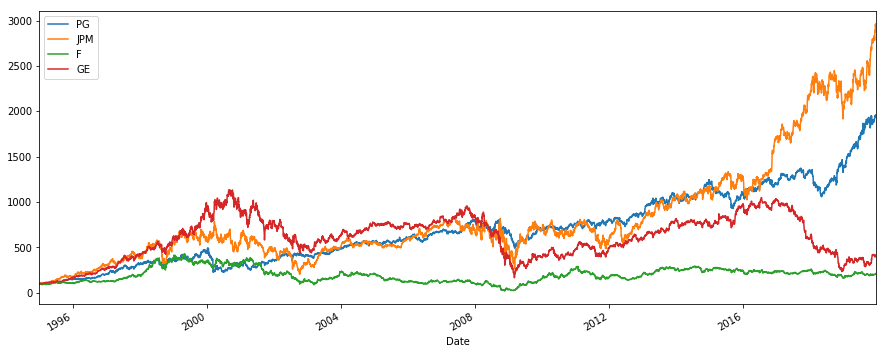

In [7]:
#normalizing the data to 100 so that when the graph begins, every security starts at 100; easier to interpret
#failure to do so causes the adjusted closing prices of all companies to be plotted directly; not a good landmark
(mydata / mydata.iloc[0] * 100).plot(figsize = (15, 6))
plt.show()

## Calculating the Return of a Porfolio of Securities


In [8]:
#simple return method (p1/p0 - 1) is preferred when analyzing a porfolio of securities
returns = (mydata / mydata.shift(1)) - 1
returns.head()

,PG,JPM,F,GE
Date,,,,
1995-01-03,NaN,NaN,NaN,NaN
1995-01-04,-0.008016,0.017241,0.026905,0.000000
1995-01-05,-0.014142,0.010169,-0.008733,0.002450
1995-01-06,0.002050,0.003356,0.000000,-0.004890
1995-01-09,-0.004090,0.006689,0.017621,-0.009828


In [9]:
#finding the annual returns of each stock (250 is # of trading days per year)
annual_returns = returns.mean() * 250
annual_returns

PG     0.142761
JPM    0.204562
F      0.106378
GE     0.101624
dtype: float64

In [10]:
#which proportion of security weights within a porfolio has had better historical performance?
weights = np.array([0.25, 0.25, 0.25, 0.25])
weights_2 = np.array([0.30, 0.15, 0.15, 0.40])
weights_3 = np.array([0.35, 0.20, 0.15, 0.30])

In [11]:
#here is the annual porfolio return of the first weighted package... RoR of porfolio = RoR of stocks * weight of stock
#we use the np.dot() function to find the dot product between vectors - annual_returns and weights
np.dot(annual_returns, weights)

0.13883109727668727

In [12]:
#lets format the output and print all three options so we can compare the returns
portfolio1 = str(round(np.dot(annual_returns, weights), 6) * 100) + ' %'
portfolio2 = str(round(np.dot(annual_returns, weights_2), 6) * 100) + ' %'
portfolio3 = str(round(np.dot(annual_returns, weights_3), 6) * 100) + ' %'

print(portfolio1)
print(portfolio2)
print(portfolio3)

13.8831 %
13.0119 %
13.7323 %


In [13]:
#we have succesfully calculated the average annual returns of our porfolio of securities!
#we can confidently say that porfolio1 has had the best average annual return with a rate of 13.8831 % 